<a href="https://colab.research.google.com/github/NicoPatalagua/Proyecto-big-data/blob/master/mta_1712.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
ObjData = pd.read_csv("mta_1712.csv")
ObjData=pd.DataFrame(ObjData)
ObjData.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-12-01 00:05:49,0,B67,MC DONALD AV/CORTELYOU RD,40.638160,-73.978939,DNTWN BKLYN SANDS ST via FLATBUSH AV,40.700253,-73.987030,NYCT_406,40.671578,-73.977672,7 AV/GARFIELD PL,approaching,130.0,2017-12-01 00:06:21,24:01:30
1,2017-12-01 00:06:19,1,Bx7,RIVERDALE AV/W 263 ST,40.912363,-73.902699,WASHINGTON HEIGHTS 166 ST via BROADWAY,40.839813,-73.939745,NYCT_4223,40.866243,-73.925258,BROADWAY/ACADEMY ST,at stop,14.0,2017-12-01 00:06:21,23:34:35
2,2017-12-01 00:05:25,0,S51,LINCOLN AV/RICHMOND RD,40.581245,-74.111990,ST GEORGE FERRY via BAY ST,40.643585,-74.072610,NYCT_7080,40.581364,-74.112033,MIDLAND AV/RICHMOND RD,< 1 stop away,209.0,2017-12-01 00:06:22,24:15:35
3,2017-12-01 00:05:56,0,M8,WEST ST/CHRISTOPHER ST,40.732847,-74.010081,"AVENUE ""D"" CROSSTOWN",40.724689,-73.974548,NYCT_3809,40.734194,-73.999677,GREENWICH AV/CHRISTOPHER ST,at stop,5.0,2017-12-01 00:06:22,24:05:24
4,2017-12-01 00:06:02,0,M101,ASTOR PL/3 AV,40.729567,-73.990052,FT GEORGE 193 ST via 3 AV,40.855666,-73.925259,NYCT_5902,40.773784,-73.957659,3 AV/E 79 ST,approaching,108.0,2017-12-01 00:06:24,24:03:01


In [0]:
ObjData=ObjData.drop(['DirectionRef','PublishedLineName','OriginName',
                      'OriginLat','OriginLong','DestinationName','DestinationLat',	
                      'DestinationLong','VehicleLocation.Latitude',	
                      'VehicleLocation.Longitude','NextStopPointName',	
                      'ArrivalProximityText','DistanceFromStop',
                      'ScheduledArrivalTime','VehicleRef'],axis=1)
ObjData.head(4)

,RecordedAtTime,ExpectedArrivalTime
0,2017-12-01 00:05:49,2017-12-01 00:06:21
1,2017-12-01 00:06:19,2017-12-01 00:06:21
2,2017-12-01 00:05:25,2017-12-01 00:06:22
3,2017-12-01 00:05:56,2017-12-01 00:06:22


In [0]:
ObjData=ObjData.dropna()
ObjData['RecordedAtTime']=pd.to_datetime(ObjData['RecordedAtTime'])
ObjData['ExpectedArrivalTime']=pd.to_datetime(ObjData['ExpectedArrivalTime'])
ObjData['RecordedAtTime']= [d.time() for d in ObjData['RecordedAtTime']]
ObjData['ExpectedArrivalTime']= [d.time() for d in ObjData['ExpectedArrivalTime']]
ObjData.head()

,RecordedAtTime,ExpectedArrivalTime
0,00:05:49,00:06:21
1,00:06:19,00:06:21
2,00:05:25,00:06:22
3,00:05:56,00:06:22
4,00:06:02,00:06:24


In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
for column in ObjData.columns:
    if ObjData[column].dtype == type(object):
        ObjRd = preprocessing.LabelEncoder()
        ObjData[column] = ObjRd.fit_transform(ObjData[column].astype(str))
ObjData = ObjData.fillna(0)
ObjData.columns = [str(i) for i in range(0,2)]
attributes = ObjData.drop('0', axis=1)
labels = ObjData['0']    
att_train,att_test,lab_train,lab_test=train_test_split(attributes,labels,test_size =0.3)
ObjData

,0,1
0,19,0
1,49,0
2,4,1
3,26,1
4,32,3
...,...,...
15128,1517,2691
15129,1514,2747
15130,1536,2675
15131,1518,2724


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(att_train, lab_train)
lab_pred= clf.predict(att_test)
print("Decision Tree Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

Decision Tree Classifier

Accuracy Score: 0.029107054760730142

Precision Score: 0.4325775891617226

Recall: 0.10009333432230628

F1 Score: 0.012122540250743063


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("Random Forest Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

Random Forest Classifier

Accuracy Score: 0.034040453872718306

Precision Score: 0.4388480732693117

Recall: 0.09306283884359594

F1 Score: 0.014867330501123576


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini', 
                             max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='auto', max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, 
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("New Random Forest Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

New Random Forest Classifier

Accuracy Score: 0.033793783917118896

Precision Score: 0.4328525146687166

Recall: 0.09395133366764571

F1 Score: 0.016163191297741703


In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("GaussianNB Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

GaussianNB Classifier

Accuracy Score: 0.023926985693142576

Precision Score: 0.7638894611974348

Recall: 0.07908101356788708

F1 Score: 0.007588644511158305


In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
__init__(self, priors=None, var_smoothing=1e-09)[source]
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("GaussianNB Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))
deepbool, default=True

NameError: ignored

In [0]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=100)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("Bagging Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

Bagging Classifier

Accuracy Score: 0.030833744449926

Precision Score: 0.4275523389539348

Recall: 0.09239277271192164

F1 Score: 0.014731975857412143


In [0]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
                        n_estimators=10, max_samples=1.0, max_features=1.0,
                        bootstrap=True, bootstrap_features=False, oob_score=False,
                        warm_start=False, n_jobs=None, random_state=None, verbose=0)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("New Bagging Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

New Bagging Classifier

Accuracy Score: 0.031080414405525406

Precision Score: 0.42644572172513046

Recall: 0.08911232151169009

F1 Score: 0.012451220645882813


In [0]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=50)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("AdaBoost Classifier with Decision Tree Clssifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

AdaBoost Classifier with Decision Tree Clssifier

Accuracy Score: 0.029107054760730142

Precision Score: 0.4333564053610996

Recall: 0.10009333432230628

F1 Score: 0.012122540250743063


In [0]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=50, 
                         learning_rate=1.0, algorithm='SAMME.R', random_state=None)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("New AdaBoost Classifier with Decision Tree Clssifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

New AdaBoost Classifier with Decision Tree Clssifier

Accuracy Score: 0.029107054760730142

Precision Score: 0.4333564053610996

Recall: 0.10009333432230628

F1 Score: 0.012122540250743063


In [0]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("Percptron Classifier")
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))

Percptron Classifier

Accuracy Score: 0.000493339911198816

Precision Score: 0.9983169137907539

Recall: 0.0008417508417508417

F1 Score: 8.305385710417777e-07


In [0]:
from sklearn.linear_model import Perceptron
clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, 
                 max_iter=1000, tol=0.001, shuffle=True, verbose=0, 
                 eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, 
                 validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
clf.fit(att_train, lab_train)
lab_pred = clf.predict(att_test)
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))


Accuracy Score: 0.000493339911198816

Precision Score: 0.9983169137907539

Recall: 0.0008417508417508417

F1 Score: 8.305385710417777e-07


In [0]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(att_train, lab_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
lab_pred = clf.predict(att_test)
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))


Accuracy Score: 0.002220029600394672

Precision Score: 0.9991601178700339

Recall: 0.0008417508417508417

F1 Score: 3.729144757941214e-06


In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty=None, max_iter=5)
clf.fit(att_train, lab_train)
SGDClassifier(max_iter=5)
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))


Accuracy Score: 0.002220029600394672

Precision Score: 0.9991601178700339

Recall: 0.0008417508417508417

F1 Score: 3.729144757941214e-06


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(penalty=None,max_iter=100)
clf.fit(att_train, lab_train)
print("\nAccuracy Score: "+ str(accuracy_score(lab_test,lab_pred)))
print("\nPrecision Score: "+str(precision_score(lab_test,lab_pred,average='macro',zero_division=1)))
print("\nRecall: "+str(recall_score(lab_test,lab_pred, average='macro',zero_division=1)))
print("\nF1 Score: "+str(f1_score(lab_test,lab_pred, average='macro')))


Accuracy Score: 0.002220029600394672

Precision Score: 0.9991601178700339

Recall: 0.0008417508417508417

F1 Score: 3.729144757941214e-06


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


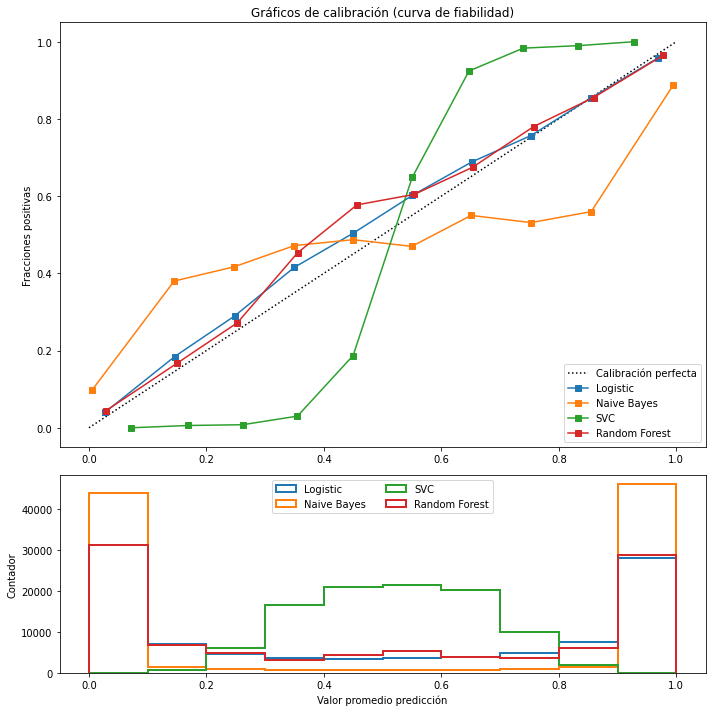

In [0]:
#https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
X_train = att_train
X_test = att_test
y_train = lab_train
y_test = lab_test
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()
# Plot calibration plots
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'SVC'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else: 
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)
ax1.set_ylabel("Fracciones positivas")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Gráficos de calibración (curva de fiabilidad)')
ax2.set_xlabel("Valor promedio predicción")
ax2.set_ylabel("Contador")
ax2.legend(loc="upper center", ncol=2)
plt.tight_layout()
plt.show()

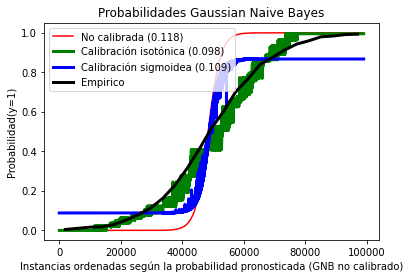

In [0]:
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
X_train = att_train
X_test = att_test
y_train = lab_train
y_test = lab_test
clf = GaussianNB()
clf.fit(X_train, y_train) 
prob_pos_clf = clf.predict_proba(X_test)[:, 1]
clf_isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
clf_isotonic.fit(X_train, y_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]
plt.figure()
order = np.lexsort((prob_pos_clf, ))
plt.plot(prob_pos_clf[order], 'r', label='No calibrada (%1.3f)' % clf_score)
plt.plot(prob_pos_isotonic[order], 'g', linewidth=3,
         label='Calibración isotónica (%1.3f)' % clf_isotonic_score)
plt.plot(prob_pos_sigmoid[order], 'b', linewidth=3,
         label='Calibración sigmoidea (%1.3f)' % clf_sigmoid_score)
plt.plot(np.linspace(0, y_test.size, 51)[1::2],
         y_test[order].reshape(25, -1).mean(1),
         'k', linewidth=3, label=r'Empirico')
plt.ylim([-0.05, 1.05])
plt.xlabel("Instancias ordenadas según la probabilidad pronosticada (GNB no calibrado)")
plt.ylabel("Probabilidad(y=1)")
plt.legend(loc="upper left")
plt.title("Probabilidades Gaussian Naive Bayes")
plt.show()